<a href="https://colab.research.google.com/github/oksanag-da/email-analysis/blob/main/Exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connecting Google Drive
from google.colab import drive
drive.mount("/content/drive")

# Changing work folder
%cd /content/drive/MyDrive/FinalProjectPython

# Uploading first dataset
df1 = pd.read_csv("events.csv")
df1.head()

Mounted at /content/drive
/content/drive/MyDrive/FinalProjectPython


,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [ ]:
print(df1.shape)

(1330, 10)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


In [ ]:
print(df1.isna().sum())

Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64


In [ ]:
print(df1.isna().sum() / df1.shape[0] * 100)

Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64


In [ ]:
# Replacing missing values in Country Code colomn with Unknown value
df1["Country Code"] = df1["Country Code"].fillna("Unknown")

In [ ]:
print(df1.isna().sum() / df1.shape[0] * 100)

Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      0.000000
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64


In [ ]:
# Deleting the rest of the NaNs
events = df1.dropna()

In [ ]:
# Checking for duplicates in data
duplicate_rows = events.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())

0       False
1       False
2       False
3       False
4       False
        ...  
1325    False
1326    False
1327    False
1328    False
1329    False
Length: 1328, dtype: bool
0


In [ ]:
# Converting the ship order date column to datetime
events["Ship Date"] = pd.to_datetime(events["Ship Date"], errors='coerce')
events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1328 non-null   int64         
 1   Order Date      1328 non-null   object        
 2   Ship Date       1328 non-null   datetime64[ns]
 3   Order Priority  1328 non-null   object        
 4   Country Code    1328 non-null   object        
 5   Product ID      1328 non-null   int64         
 6   Sales Channel   1328 non-null   object        
 7   Units Sold      1328 non-null   float64       
 8   Unit Price      1328 non-null   float64       
 9   Unit Cost       1328 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 114.1+ KB


<ipython-input-53-ac4b3ef04059>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events["Ship Date"] = pd.to_datetime(events["Ship Date"], errors='coerce')


In [ ]:
# Converting the order date column to datetime
events["Order Date"] = pd.to_datetime(events["Order Date"], errors='coerce')
events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1328 non-null   int64         
 1   Order Date      1328 non-null   datetime64[ns]
 2   Ship Date       1328 non-null   datetime64[ns]
 3   Order Priority  1328 non-null   object        
 4   Country Code    1328 non-null   object        
 5   Product ID      1328 non-null   int64         
 6   Sales Channel   1328 non-null   object        
 7   Units Sold      1328 non-null   float64       
 8   Unit Price      1328 non-null   float64       
 9   Unit Cost       1328 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 114.1+ KB


<ipython-input-54-6d415513cce6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events["Order Date"] = pd.to_datetime(events["Order Date"], errors='coerce')


In [ ]:
# Uploading second dataset
df2 = pd.read_csv("countries.csv")
df2.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [ ]:
print(df2.shape)

(249, 5)


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [ ]:
print(df2.isna().sum())

name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64


In [ ]:
print(df2.isna().sum() / df2.shape[0] * 100)

name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64


In [ ]:
# Deleting the NaNs
countries = df2.dropna()

In [ ]:
# Checking for duplicates in data
duplicate_rows = countries.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())

0      False
1      False
2      False
3      False
4      False
       ...  
244    False
245    False
246    False
247    False
248    False
Length: 247, dtype: bool
0


In [ ]:
# Uploading third dataset
df3 = pd.read_csv("products.csv")
df3.head()

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [ ]:
print(df3.shape)
df3.info()

(12, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


In [ ]:
print(df3.isna().sum())

id           0
item_type    0
dtype: int64


In [ ]:
print(df3.isna().sum() / df3.shape[0] * 100)

id           0.0
item_type    0.0
dtype: float64


In [ ]:
# Deleting the NaNs
products = df3.dropna()

In [ ]:
# Checking for duplicates in data
duplicate_rows = products.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool
0


In [ ]:
# Deleting alpha-2 column from the Countries dataset
del countries ["alpha-2"]

# Renaming the columns to be more consistant
events.columns = ["Order_ID", "Order_Date", "Ship_Date", "Order_Priority", "Country_Code",
              "Product_ID", "Sales_Channel", "Units_Sold", "Unit_Price", "Unit_Cost"]

products.columns = ["Product_ID", "Product_Category"]

countries.columns = ['Country', "Country_Code", "Region", "Sub_Region"]

# Joining the datasets into one
final = events.merge(products, on="Product_ID", how="inner").merge(countries, on="Country_Code", how="inner")

final.head()

,Order_ID,Order_Date,Ship_Date,Order_Priority,Country_Code,Product_ID,Sales_Channel,Units_Sold,Unit_Price,Unit_Cost,Product_Category,Country,Region,Sub_Region
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Cereal,Norway,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Cereal,Serbia,Europe,Southern Europe
2,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Clothes,Montenegro,Europe,Southern Europe
3,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Beverages,Serbia,Europe,Southern Europe
4,103450715,2015-03-15,2015-04-18,H,SVK,8681,Online,2220.0,651.21,524.96,Office Supplies,Slovakia,Europe,Eastern Europe


#Total number of orders

In [ ]:
total_orders = final["Order_ID"].nunique()
print("Total Orders:", total_orders)

Total Orders: 1246


#Total profit

In [ ]:
final["Total_Profit"] = (final["Units_Sold"] * final["Unit_Price"]) - (final["Units_Sold"] * final["Unit_Cost"])
total_profit = final["Total_Profit"].sum()
print("Total Profit ($):", total_profit)

Total Profit ($): 473709035.06


#Total Number of Countries Covered

In [ ]:
total_countries = final["Country"].nunique()
print("Total Countries:", total_countries)

Total Countries: 45


#Total Number of Sold Units

In [ ]:
total_units_sold = final["Units_Sold"].sum()
print("Total Units Sold:", total_units_sold)

Total Units Sold: 6171671.0


# Most Profitable Product Category

In [ ]:
most_profitable_category = final.groupby("Product_Category")["Total_Profit"].sum().idxmax()
print("Most Profitable Product Category:", most_profitable_category)

Most Profitable Product Category: Cosmetics


#Sales Channel Performance (Online vs. Offline)

In [ ]:
sales_channel_performance = final.groupby("Sales_Channel")["Total_Profit"].sum()
print(sales_channel_performance)

Sales_Channel
Offline    2.385113e+08
Online     2.340276e+08
online     1.170094e+06
Name: Total_Profit, dtype: float64


In [ ]:
# Converting all values to title case and remove extra spaces
final["Sales_Channel"] = final["Sales_Channel"].str.strip().str.title()
print(final["Sales_Channel"].unique())

['Online' 'Offline']


#Financial Metrics Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing data
final["Revenue"] = final["Units_Sold"] * final["Unit_Price"]
final["Cost"] = final["Units_Sold"] * final["Unit_Cost"]
final["Profit"] = final["Revenue"] - final["Cost"]

##Profit by Product Categoty

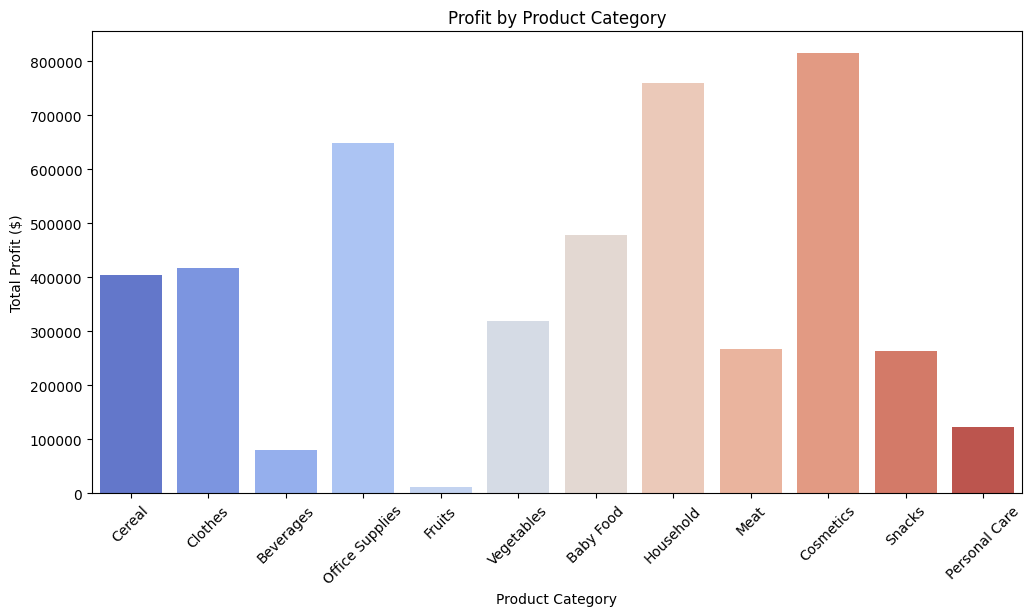

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=final, x="Product_Category", hue="Product_Category", y="Profit", palette="coolwarm", errorbar=None)
plt.xticks(rotation=45)
plt.title("Profit by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Profit ($)")
plt.show()

##Profit by Country

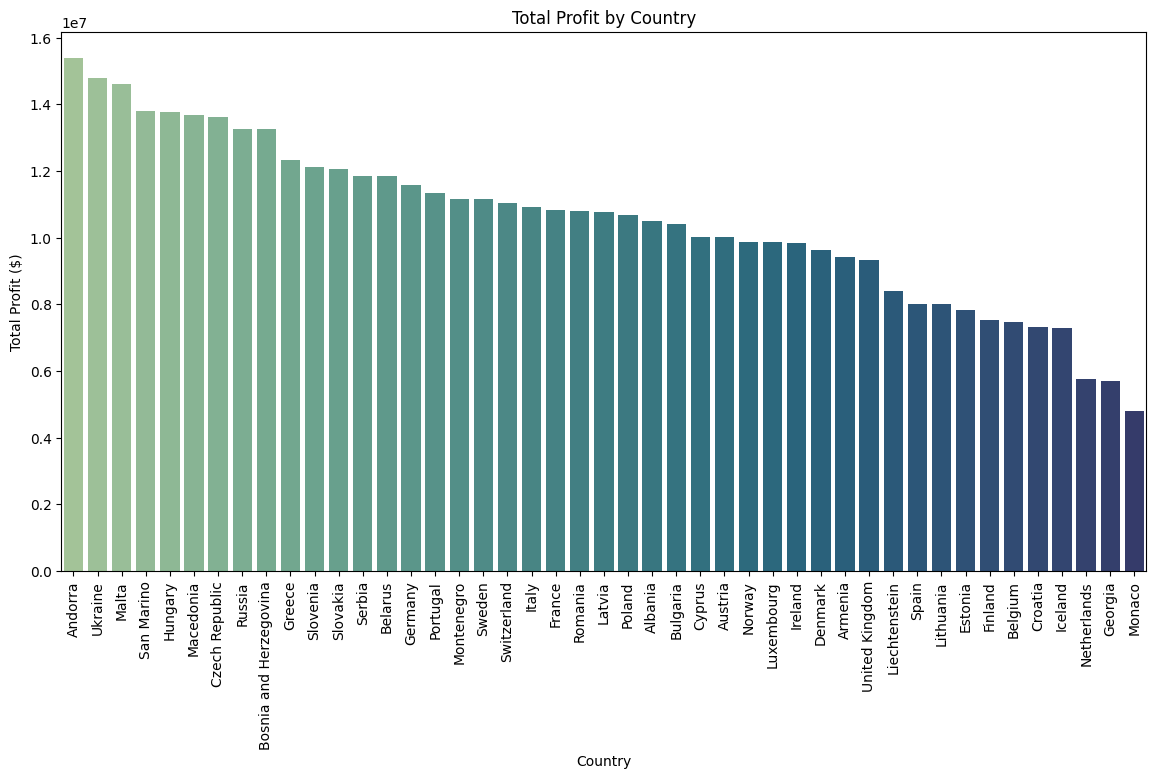

In [ ]:
plt.figure(figsize=(14, 7))
country_profit = final.groupby("Country")["Profit"].sum().sort_values(ascending=False)
sns.barplot(x=country_profit.index, y=country_profit.values, palette="crest", hue=country_profit.index, errorbar=None)
plt.xticks(rotation=90)
plt.title("Total Profit by Country")
plt.xlabel("Country")
plt.ylabel("Total Profit ($)")
plt.show()

##Profict by Sales Channel

<ipython-input-143-381385545b73>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=final, x="Sales_Channel", y="Profit", palette="cubehelix", errorbar=None)


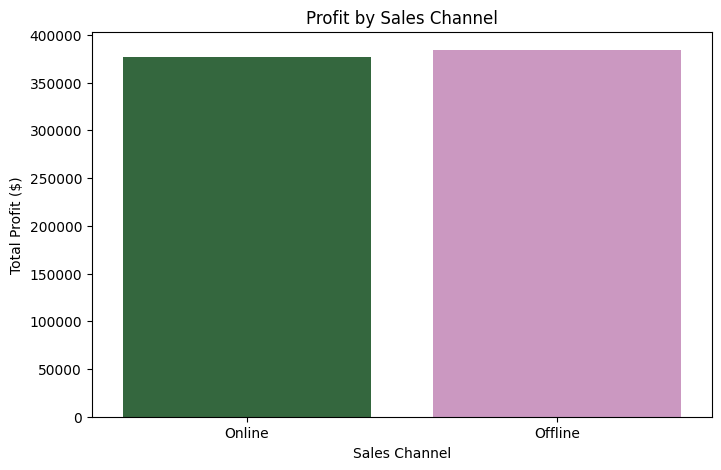

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=final, x="Sales_Channel", y="Profit", palette="cubehelix", errorbar=None)
plt.title("Profit by Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Total Profit ($)")
plt.show()

##Profit by Region

<ipython-input-101-34b35e736928>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_profit, x="Sub_Region", y="Profit", palette="crest")


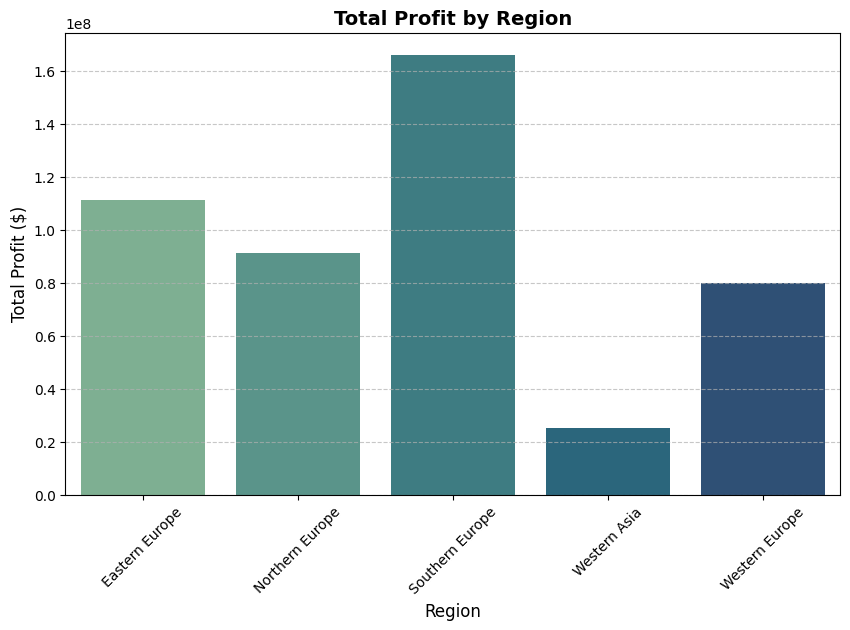

In [ ]:
region_profit = final.groupby("Sub_Region")["Profit"].sum().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=region_profit, x="Sub_Region", y="Profit", palette="crest")

# Customize the plot
plt.title("Total Profit by Region", fontsize=14, fontweight="bold")
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Profit ($)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

##Product Popularity by Category

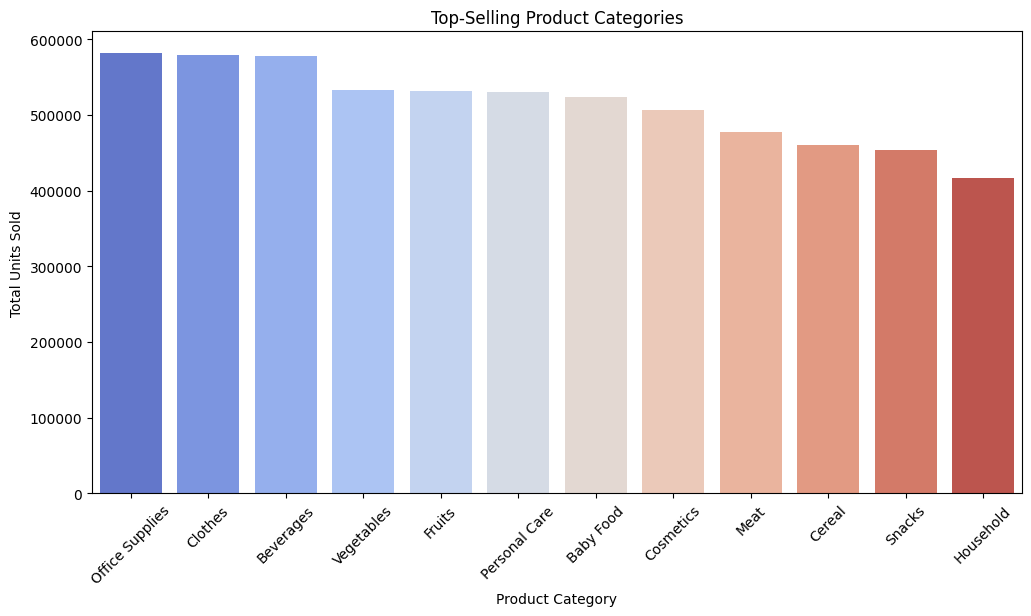

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Aggregate total units sold by product category and sort in descending order
category_sales = final.groupby("Product_Category")["Units_Sold"].sum().reset_index()
category_sales = category_sales.sort_values(by="Units_Sold", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales, x="Product_Category", y="Units_Sold", hue="Product_Category",
            palette="coolwarm", errorbar=None, legend=False)

plt.xticks(rotation=45)
plt.title("Top-Selling Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Total Units Sold")
plt.show()

#Geographical Sales Insights

##Sales by Region

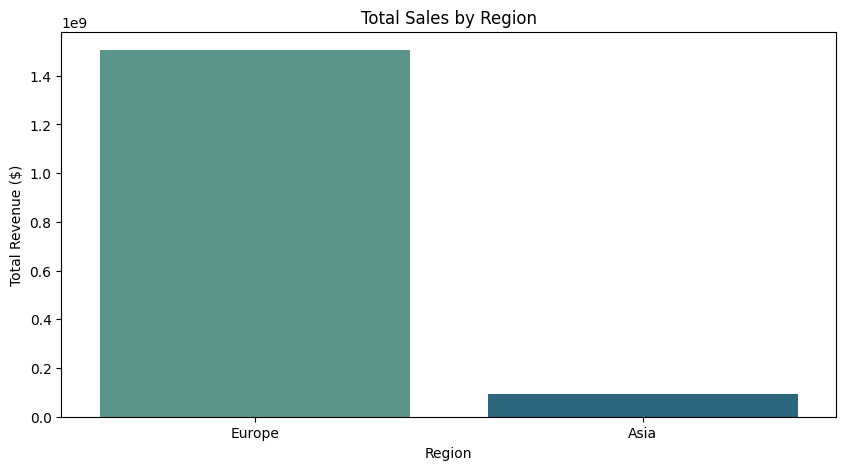

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=final, x="Region", y="Revenue", estimator=sum, palette="crest",  errorbar=None, legend=False, hue="Region")
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue ($)")
plt.show()

##Sales by Country

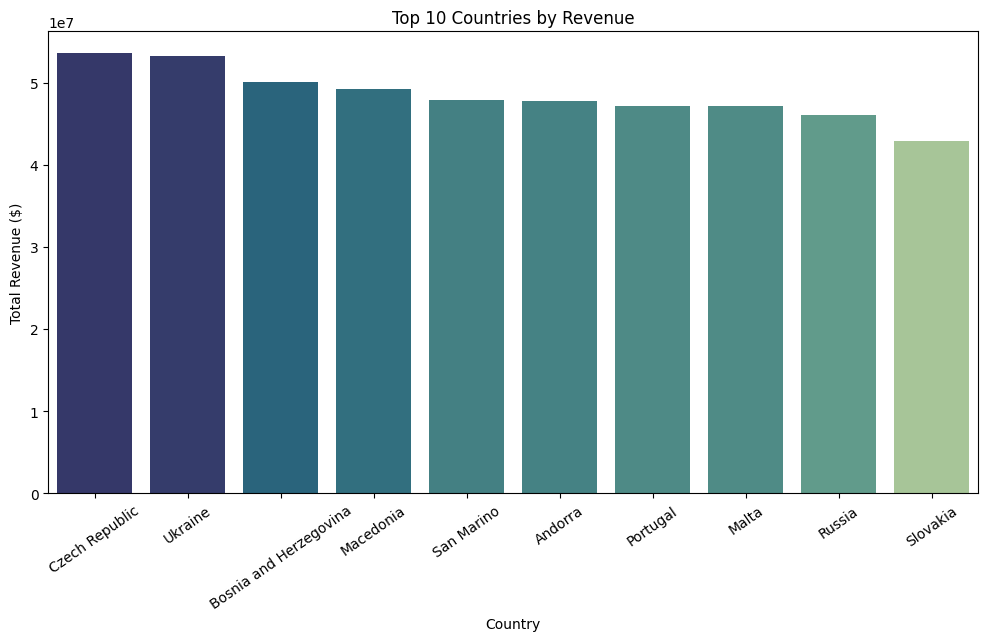

In [ ]:
top_countries = final.groupby("Country")["Revenue"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="crest", hue=top_countries, legend=False)
plt.xticks(rotation=35)
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Total Revenue ($)")
plt.show()

##Online vs. Offline Sales Comparison

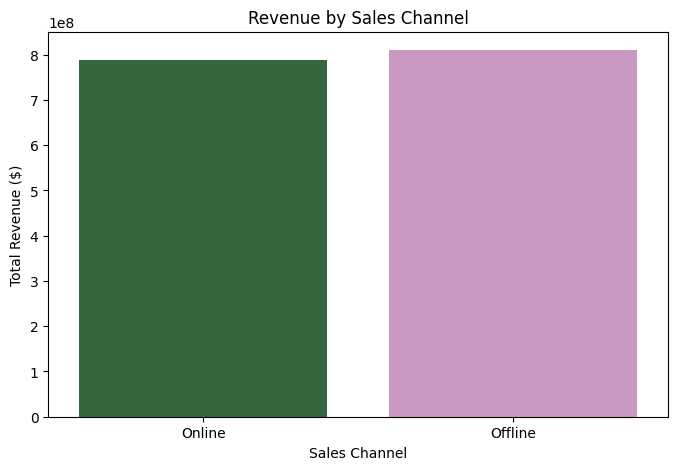

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=final, x="Sales_Channel", y="Revenue", estimator=sum, palette="cubehelix", hue="Sales_Channel", legend=False, errorbar=None)
plt.title("Revenue by Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Total Revenue ($)")
plt.show()

#Order Processing Time Analysis

In [ ]:
final["Processing_Time"] = (final["Ship_Date"] - final["Order_Date"]).dt.days

##Processing Time by Product Category

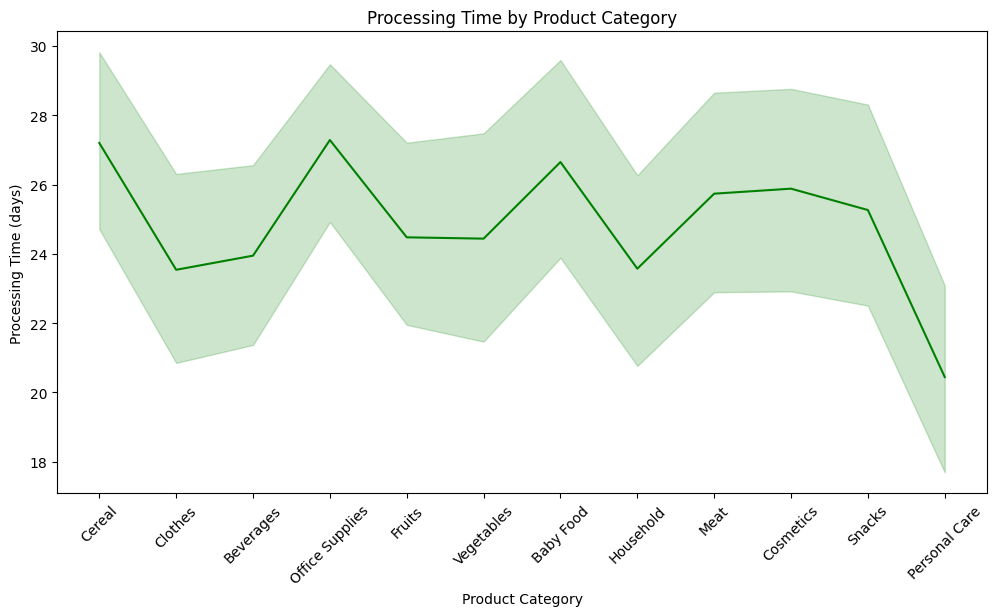

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.lineplot(data=final, x="Product_Category", y="Processing_Time", color="green")
plt.xticks(rotation=45)
plt.title("Processing Time by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Processing Time (days)")
plt.show()

##Processing Time by Region

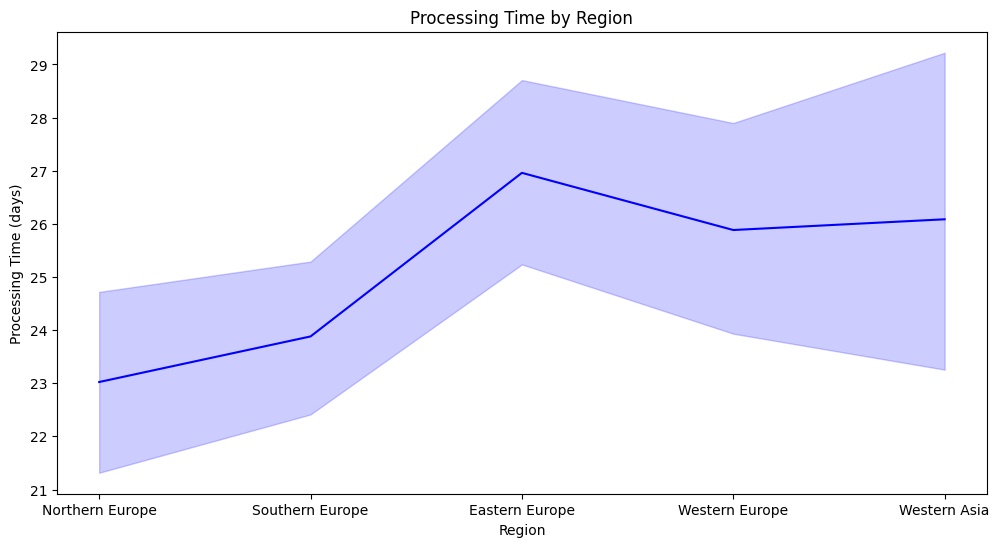

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=final, x="Sub_Region", y="Processing_Time", color="blue")
plt.title("Processing Time by Region")
plt.xlabel("Region")
plt.ylabel("Processing Time (days)")
plt.show()

##Processing Time by Country

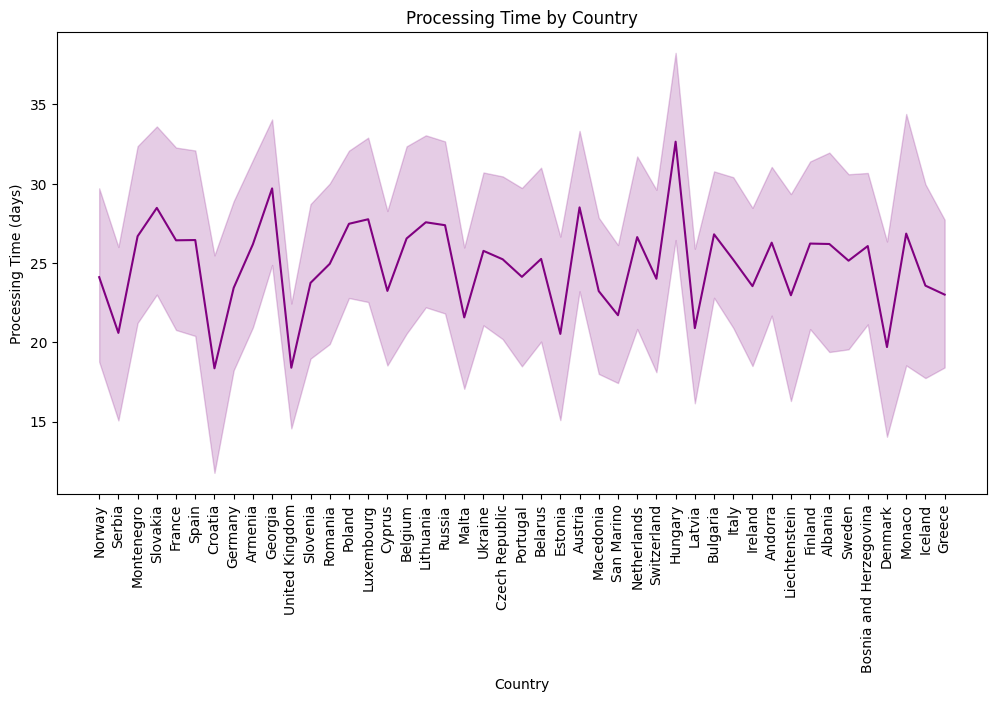

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=final, x="Country", y="Processing_Time", color="purple")
plt.xticks(rotation=90)
plt.title("Processing Time by Country")
plt.xlabel("Country")
plt.ylabel("Processing Time (days)")
plt.show()

##Profit vs. Shipping Time

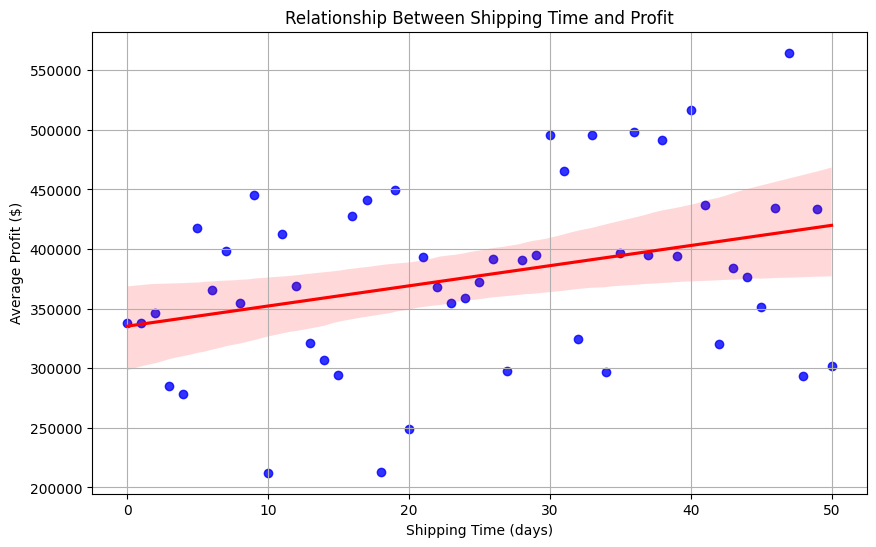

In [ ]:
# Aggregate: average profit per shipping time
shipping_profit = final.groupby("Processing_Time")["Profit"].mean().reset_index()

# Plot scatter plot with trend line
plt.figure(figsize=(10,6))
sns.regplot(data=shipping_profit, x="Processing_Time", y="Profit", scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title("Relationship Between Shipping Time and Profit")
plt.xlabel("Shipping Time (days)")
plt.ylabel("Average Profit ($)")
plt.grid(True)
plt.show()

#Sales Dynamics

#### Sales Dynamic by Product Category

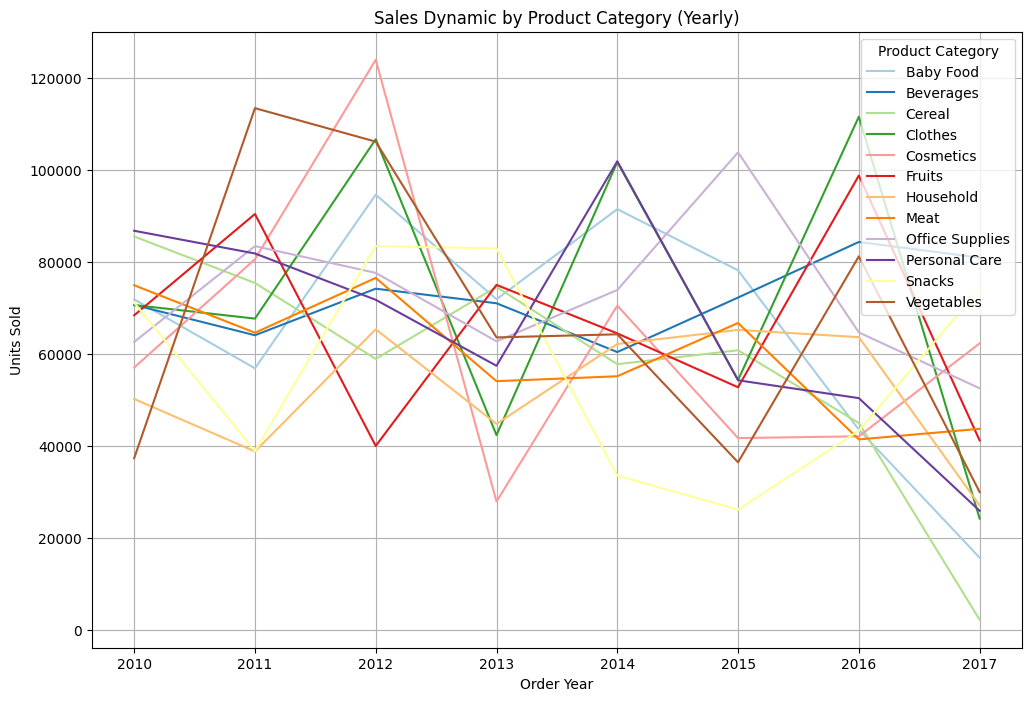

In [ ]:
# Extract the year from the Order_Date column
final['Order_Year'] = final['Order_Date'].dt.year

# Aggregate total units sold by product category and order year
sales_category = final.groupby(['Order_Year', 'Product_Category'])['Units_Sold'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=sales_category, x='Order_Year', y='Units_Sold', hue='Product_Category', palette='Paired')

plt.title('Sales Dynamic by Product Category (Yearly)')
plt.xlabel('Order Year')
plt.ylabel('Units Sold')
plt.grid(True)
plt.legend(title='Product Category')
plt.show()

##Sales Dynamic by Region

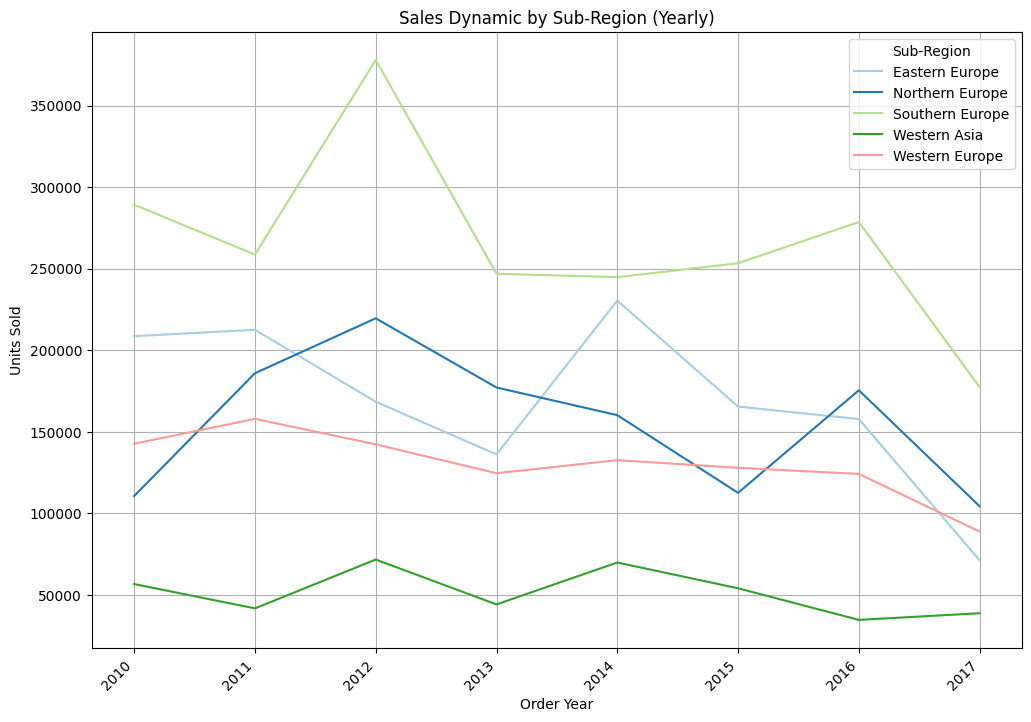

In [ ]:
# Extract the year from the Order_Date column
final['Order_Year'] = final['Order_Date'].dt.year

# Aggregate total units sold by sub-region and order year
sales_subregion = final.groupby(['Order_Year', 'Sub_Region'])['Units_Sold'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=sales_subregion, x='Order_Year', y='Units_Sold', hue='Sub_Region', palette='Paired')

plt.title('Sales Dynamic by Sub-Region (Yearly)')
plt.xlabel('Order Year')
plt.ylabel('Units Sold')
plt.grid(True)
plt.legend(title='Sub-Region')
plt.xticks(rotation=45, ha='right')
plt.show()

##Sales Dynamic by Country

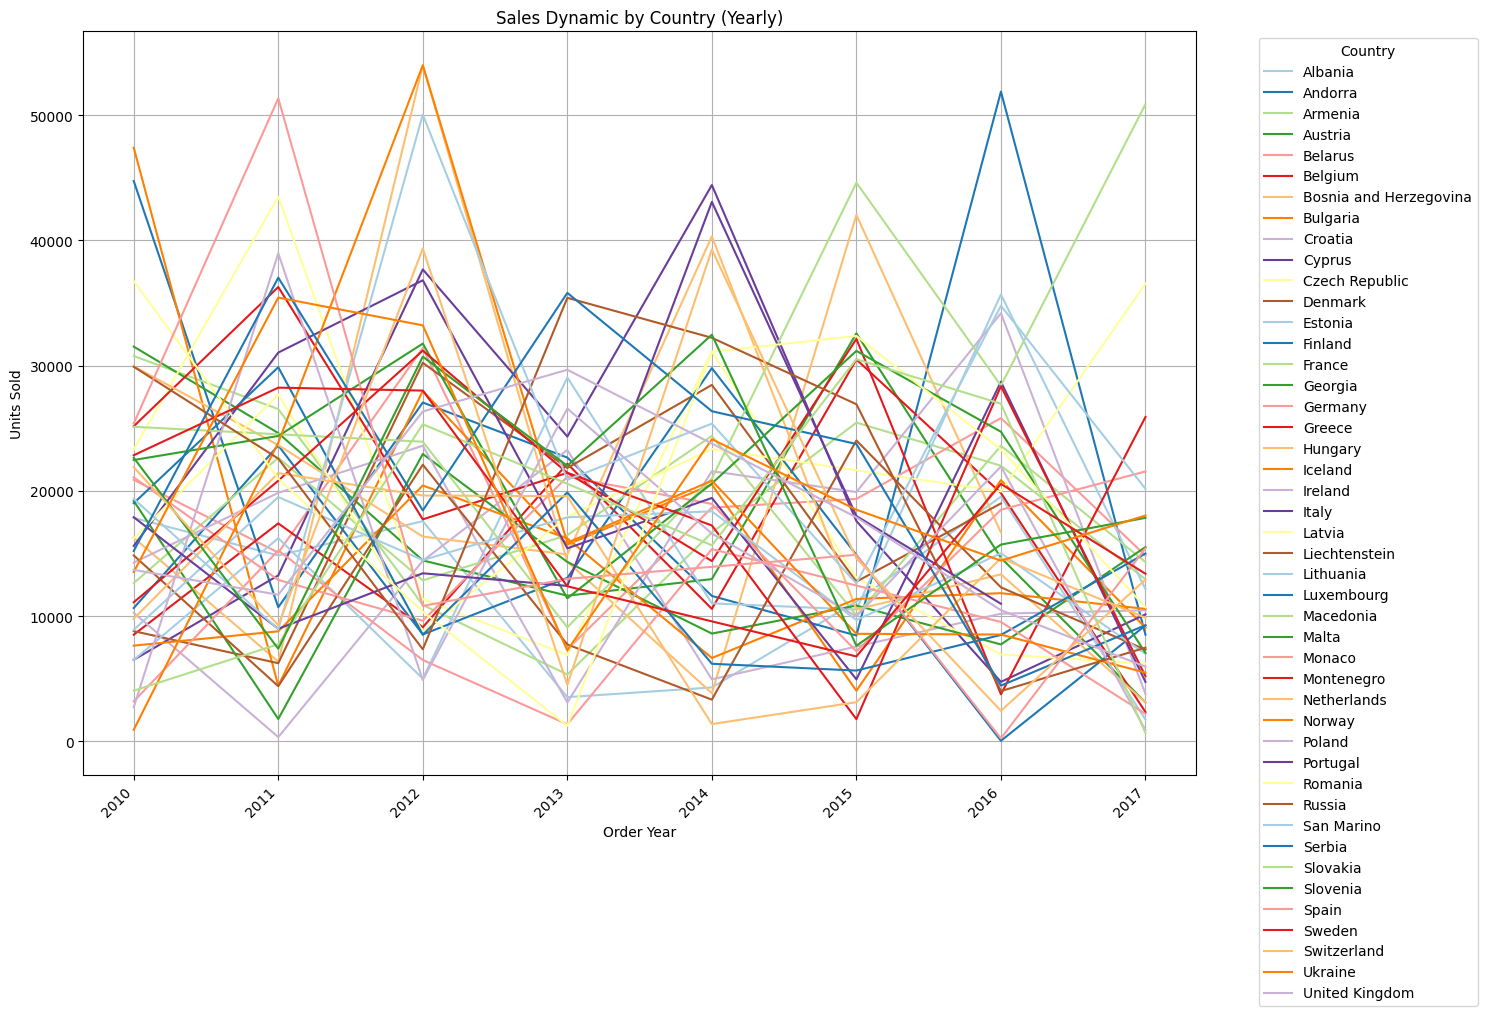

In [ ]:
# Extract the year from the Order_Date column
final['Order_Year'] = final['Order_Date'].dt.year

# Aggregate total units sold by country and order year
sales_country = final.groupby(['Order_Year', 'Country'])['Units_Sold'].sum().reset_index()

# Plot
plt.figure(figsize=(15, 10))  # Adjust figure size for better readability
sns.lineplot(data=sales_country, x='Order_Year', y='Units_Sold', hue='Country', palette='Paired')

plt.title('Sales Dynamic by Country (Yearly)')
plt.xlabel('Order Year')
plt.ylabel('Units Sold')
plt.grid(True)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

Sales Dynamic by Channel

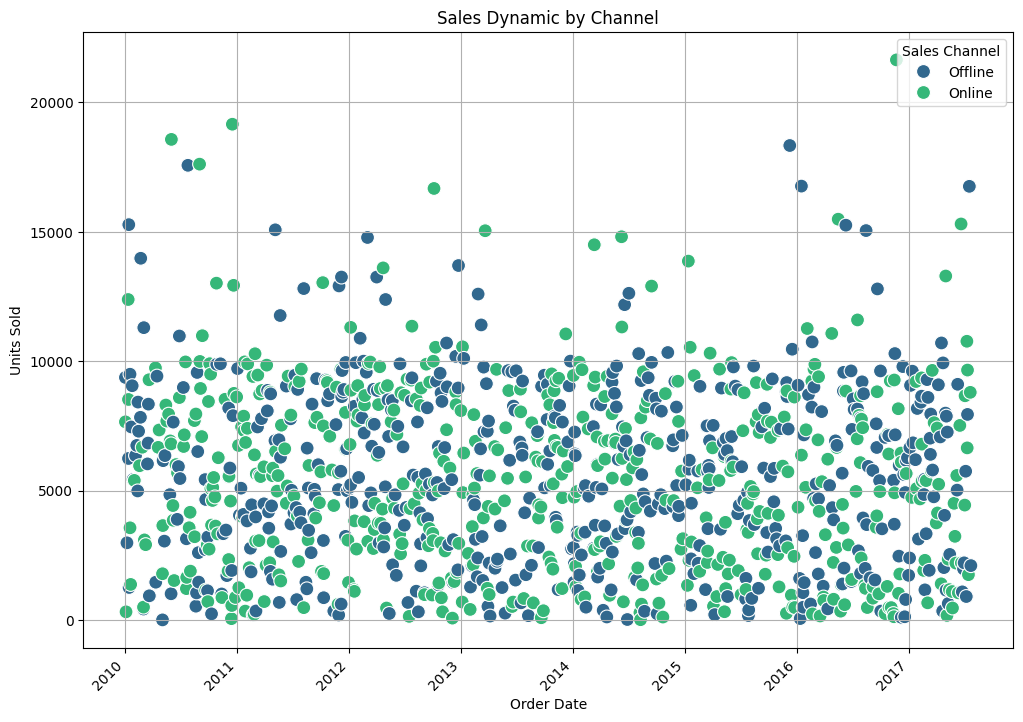

In [ ]:
# Aggregate total units sold by sales channel and order date
sales_channel = final.groupby(['Order_Date', 'Sales_Channel'])['Units_Sold'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=sales_channel, x='Order_Date', y='Units_Sold', hue='Sales_Channel', palette='viridis', s=100)  # s=100 to increase marker size

plt.title('Sales Dynamic by Channel')
plt.xlabel('Order Date')
plt.ylabel('Units Sold')
plt.grid(True)
plt.legend(title='Sales Channel')
plt.xticks(rotation=45, ha='right')
plt.show()

##Sales Dynamic by Week Day

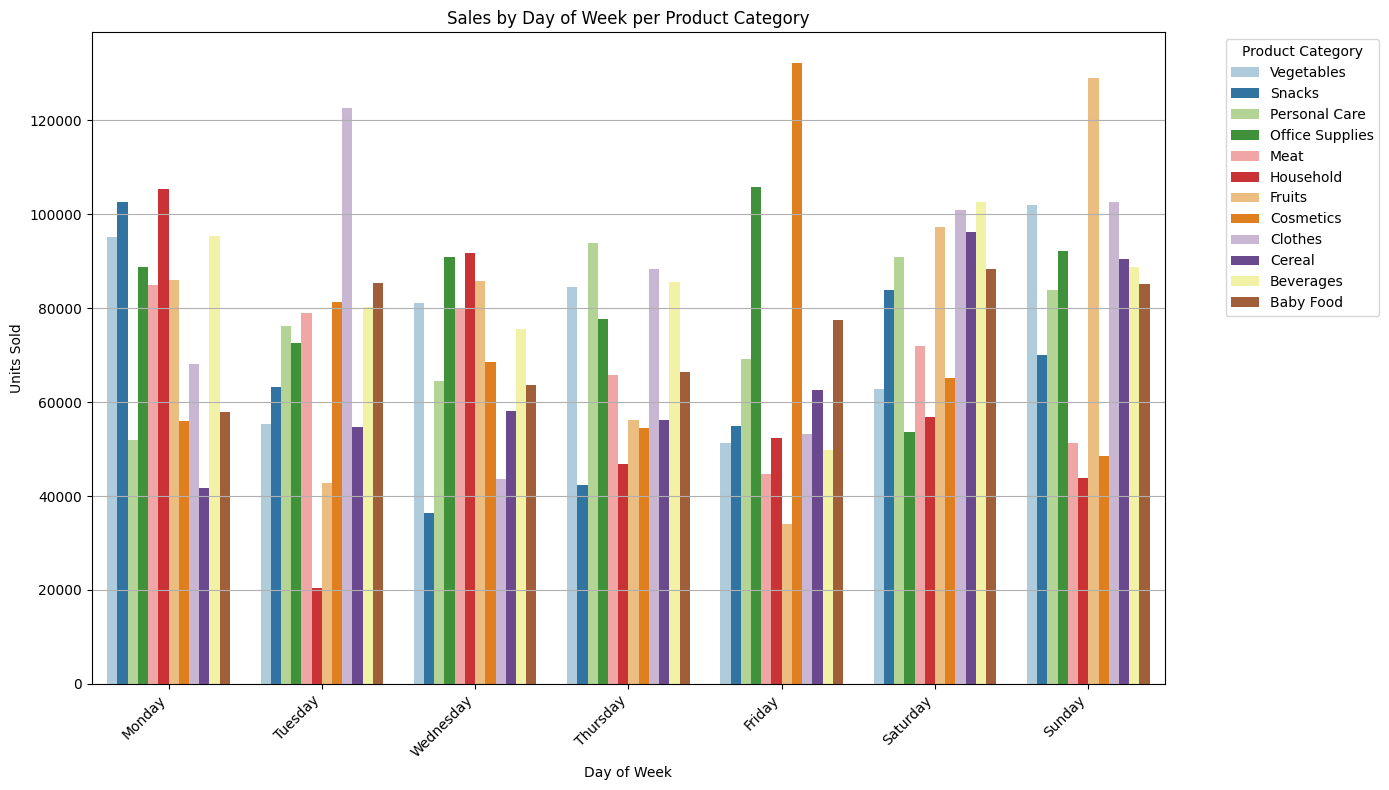

In [ ]:
# Extract day of the week from Order_Date
final['Order_DayOfWeek'] = final['Order_Date'].dt.day_name()

# Aggregate total units sold by day of the week and product category
sales_dayofweek_category = final.groupby(['Order_DayOfWeek', 'Product_Category'])['Units_Sold'].sum().reset_index()

# Order days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_dayofweek_category['Order_DayOfWeek'] = pd.Categorical(sales_dayofweek_category['Order_DayOfWeek'], categories=days_order, ordered=True)
sales_dayofweek_category = sales_dayofweek_category.sort_values('Order_DayOfWeek')

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=sales_dayofweek_category, x='Order_DayOfWeek', y='Units_Sold', hue='Product_Category', palette='Paired')

plt.title('Sales by Day of Week per Product Category')
plt.xlabel('Day of Week')
plt.ylabel('Units Sold')
plt.grid(axis='y')  # Add gridlines to the y-axis
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

#Sales Dynamic Results Summary

###Sales Dynamic by Product Category (Yearly):

- Overall Trend: Sales of most product categories show an increasing trend over the years.
- Top Performers: Certain categories, such as "Clothes," "Cosmetics," and "Household," consistently exhibit higher sales compared to others.
- Seasonal Patterns: Some categories might have seasonal peaks, indicating potential opportunities for targeted promotions or inventory management.

###Sales Dynamic by Sub-Region (Yearly):

- Regional Differences: Sales performance varies significantly across sub-regions, highlighting the importance of understanding regional market dynamics.
- Growth Areas: Some sub-regions demonstrate consistent growth in sales, indicating potential areas for expansion or focused marketing efforts.

###Sales Dynamic by Country (Yearly):

- Country-Specific Trends: Sales trends differ across countries, emphasizing the need for tailored strategies for individual markets.
- Top Contributors: Identifying countries with the highest sales volume can help prioritize resources and target marketing campaigns.

###Sales Dynamic by Channel:

- Channel Performance: The scatter plot helps compare the sales performance of different sales channels (e.g., online vs. offline) over time.
- Trends and Patterns: Identifying any trends or patterns in sales for specific channels can guide strategic decisions related to channel management and marketing.

###Sales Dynamic by Day of Week:

- Weekday vs. Weekend: Sales might be higher on certain days of the week, suggesting potential adjustments in staffing or promotional activities.
- Category-Specific Patterns: Sales by day of the week can vary across product categories, indicating potential opportunities for targeted marketing or inventory management.

###Sales by Day of Week per Product Category:

- Category and Day of Week Interaction: The grouped bar plot reveals how sales patterns differ across product categories and days of the week.
- Targeted Strategies: Identifying specific days of the week where certain categories perform well can help optimize marketing and promotional efforts.

###Overall Insights:

- Understanding Trends: The visualizations help identify sales trends by product category, region, channel, and day of the week.
- Targeted Strategies: The insights gained can be used to develop targeted marketing campaigns, optimize inventory management, and tailor strategies for specific regions or product categories.
- Performance Monitoring: Continuous monitoring of sales dynamics is crucial for adapting to changing market conditions and maximizing business performance.